# CS156 Location Based Assignment   
# Image Reconstruction - The Lonely Croissant
### Yuhao Chen
### Fall 2019

## Part 0. Introduction

While I was having my breakfast yesterday, the croissant fell from my table. I was so angry to the careless croissant. To punish it, I left the bitten croissant on my balcony for self-examination. It stays there whatever winds or rains. <br>

<img src="imgs/00.jpg"
     style="margin: auto;" 
     height=300
     width=450/> <br>

For this scene, I call it:
###                                <span style="color:#FABC21">LONELY CROISSANT</span>

I took photos of the lonely croissant every 10 minutes from 2:00pm to 5:50pm. In this 4 hours, 24 photos are taken. In this assignment, I will use PCA to project the images into 2D presentation, and then reconstruct the images to see the results.

## Part 1. Import Libraries And Photos

### Import libraries

In [1]:
# Import necessary python libraies
%matplotlib inline
from PIL import Image
import PIL.ImageOps
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Transfer Image To Arrays

In [2]:
# Upload images
imgs = sorted(glob('imgs/*'))
imgs_set=[]

# Open all images and store them in datasets
for img in imgs:
    im = Image.open(img)
    # Turn the image into 512px*384px
    imgs_set.append(np.array(im.resize((512,384))))

# Exclude the sample image and other images
imgs_set=imgs_set[1:25]

# Turn the images into array
imgs_set = np.asarray(imgs_set)

# Print the shape of the array
print(imgs_set.shape)

(24, 384, 512, 3)


### Show the photos of LONELY CROISSANT

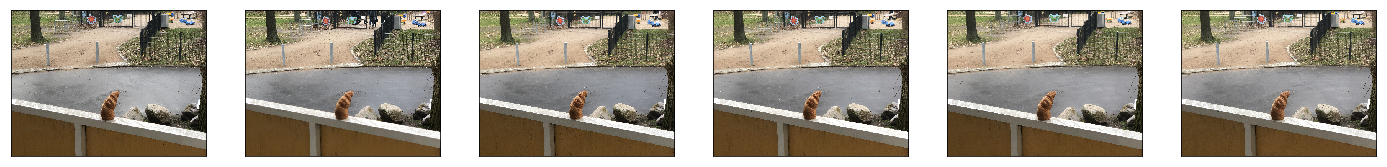

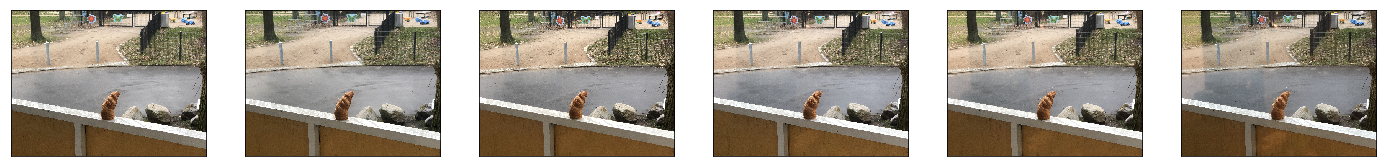

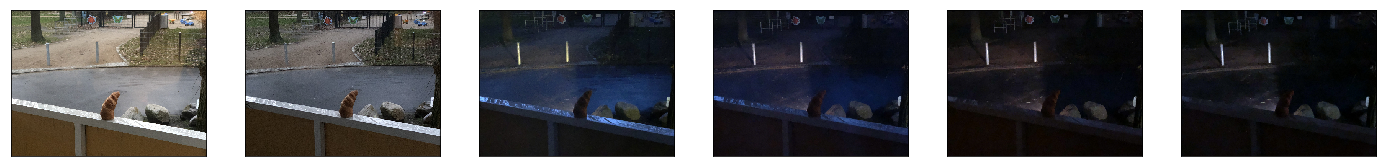

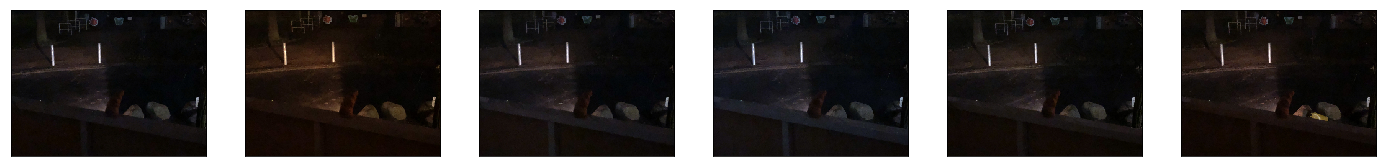

In [3]:
# Print all 24 images in 4 rows
# Forgive me of using such a silly way to plot the 4 rows. There was a bug stopping me directly plot the 4 rows.
p1 = plt.figure(figsize=(100, 120))
for i in range(6):
    ax = p1.add_subplot(1, 24, i + 1, xticks = [], yticks = [])
    ax.imshow(imgs_set[i][::-1])
p2 = plt.figure(figsize=(100, 120))
for i in range(6,12):
    ax = p2.add_subplot(1, 24, i + 1, xticks = [], yticks = [])
    ax.imshow(imgs_set[i][::-1])
p3 = plt.figure(figsize=(100, 120))
for i in range(12,18):
    ax = p3.add_subplot(1, 24, i + 1, xticks = [], yticks = [])
    ax.imshow(imgs_set[i][::-1])
p4 = plt.figure(figsize=(100, 120))
for i in range(18,24):
    ax = p4.add_subplot(1, 24, i + 1, xticks = [], yticks = [])
    ax.imshow(imgs_set[i][::-1])
    
plt.show()

We can see that the sky turns dark when the 14th images was shot.

## Part 2. Principal Components Analysis

### Turn 3D array into 1D array

Originally, each image is presented by a 3-dimensional array($384\times 512\times 3$). For PCA, I want to use 1-dimensional arrays to present each individual image. To do this, I turn all the 3D arrays into 1D arrays.

In [4]:
# This functions turn the 3-dimensional array into a 1-dimensional one
def flatten_array(imgs):
    new_array=[]
    for height in imgs:
        for width in height:
            for color in width:
                new_array.append(color)
    return np.array(new_array)

In [5]:
# I turn all the images to 1D arrays
flat_imgs=[]
for imgs in imgs_set:
    flat_imgs.append(flatten_array(imgs))

# Turn the data into a dataframe
flat_imgs=pd.DataFrame(np.array(flat_imgs))

### Use PCA to fit and transform the images

In [6]:
# Project the arrays into 2-dimensional space
pca=PCA(n_components=2)
# Fit and transform the image arrays
compressed_imgs=pca.fit_transform(flat_imgs)

### Plot the projections of the arrays on 2D space

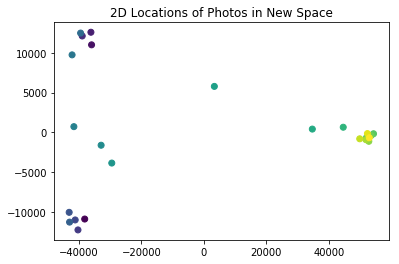

In [7]:
# Plot all the points representing the photos

# Draw a color map. 
# Darker a point is, smaller the index of the photo is
# Lighter a point is, larger the index of the photo is
colors=list(range(1,25))
plt.scatter(compressed_imgs[:,0], compressed_imgs[:,1], c=colors)
plt.title("2D Locations of Photos in New Space")
plt.show()

From the plot we can see that: the photos taken early with bright sky(shown by dark points) tend to appear in the left part of the space, and the photos taken late with dark sky(shown by light points) tend to appear in the right part of the space.

## Part 3. Photo Reconstructions 

### Transform from 2D coordinates to Image Arrays

In [8]:
recon_imgs = pca.inverse_transform(compressed_imgs)

In [9]:
# Define a function to turn 1D array back into 3D array
def reconstruct_image(compressed_imgs):
    # Create an empty array
    new_array=np.zeros(shape=(384,512,3))
    
    # Feed in all the 1D array values into the 3D array
    for i in range(len(compressed_imgs)):
        new_array[int(i/(3*512))][int((i%(3*512))/3)][i%3]=compressed_imgs[i]
    
    # Return a 'uint8' type array so that all RGB color values are integers
    return new_array.astype('uint8')

In [10]:
# Check the shape of the array to make sure it is the same with the original one
print(reconstruct_image(recon_imgs[0]).shape)

(384, 512, 3)


### Plot the reconstruction of the first image and the original photo

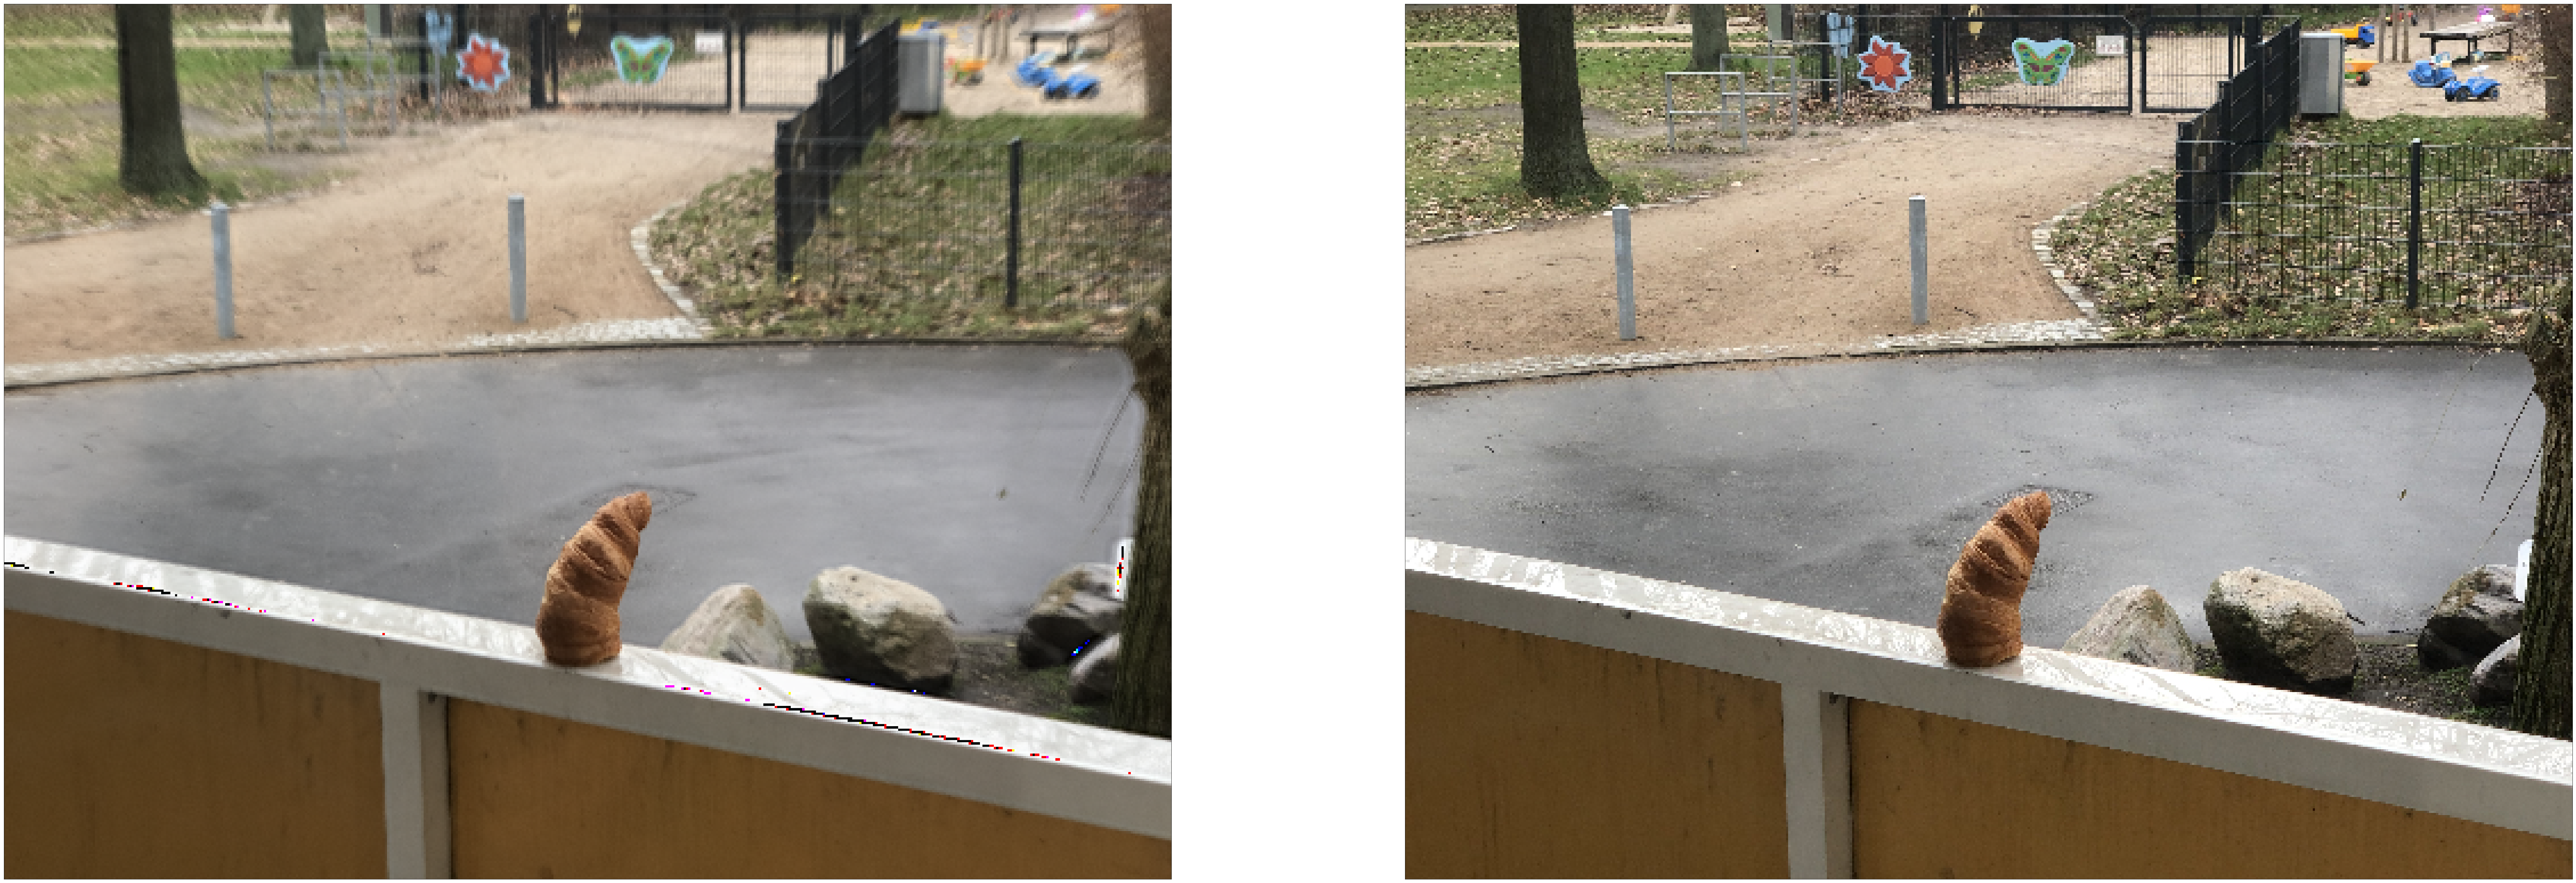

In [11]:
# Plot the reconstruction of the first photo and its original photo to check the similarity
p1 = plt.figure(figsize=(200, 300))

# Plot the reconstructed result
ax1 = p1.add_subplot(1, 3, 1, xticks = [], yticks = [])
ax1.imshow(reconstruct_image(recon_imgs[0])[::-1])

# Plot the original result
ax2 = p1.add_subplot(1, 3, 2, xticks = [], yticks = [])
ax2.imshow(imgs_set[0][::-1])

plt.show()

The left one is the reconstructed photo, while the right one is the original photo. We can tell that the reconstruction is nearly perfect.

### Plot the reconstruction of the last photo and its original photo

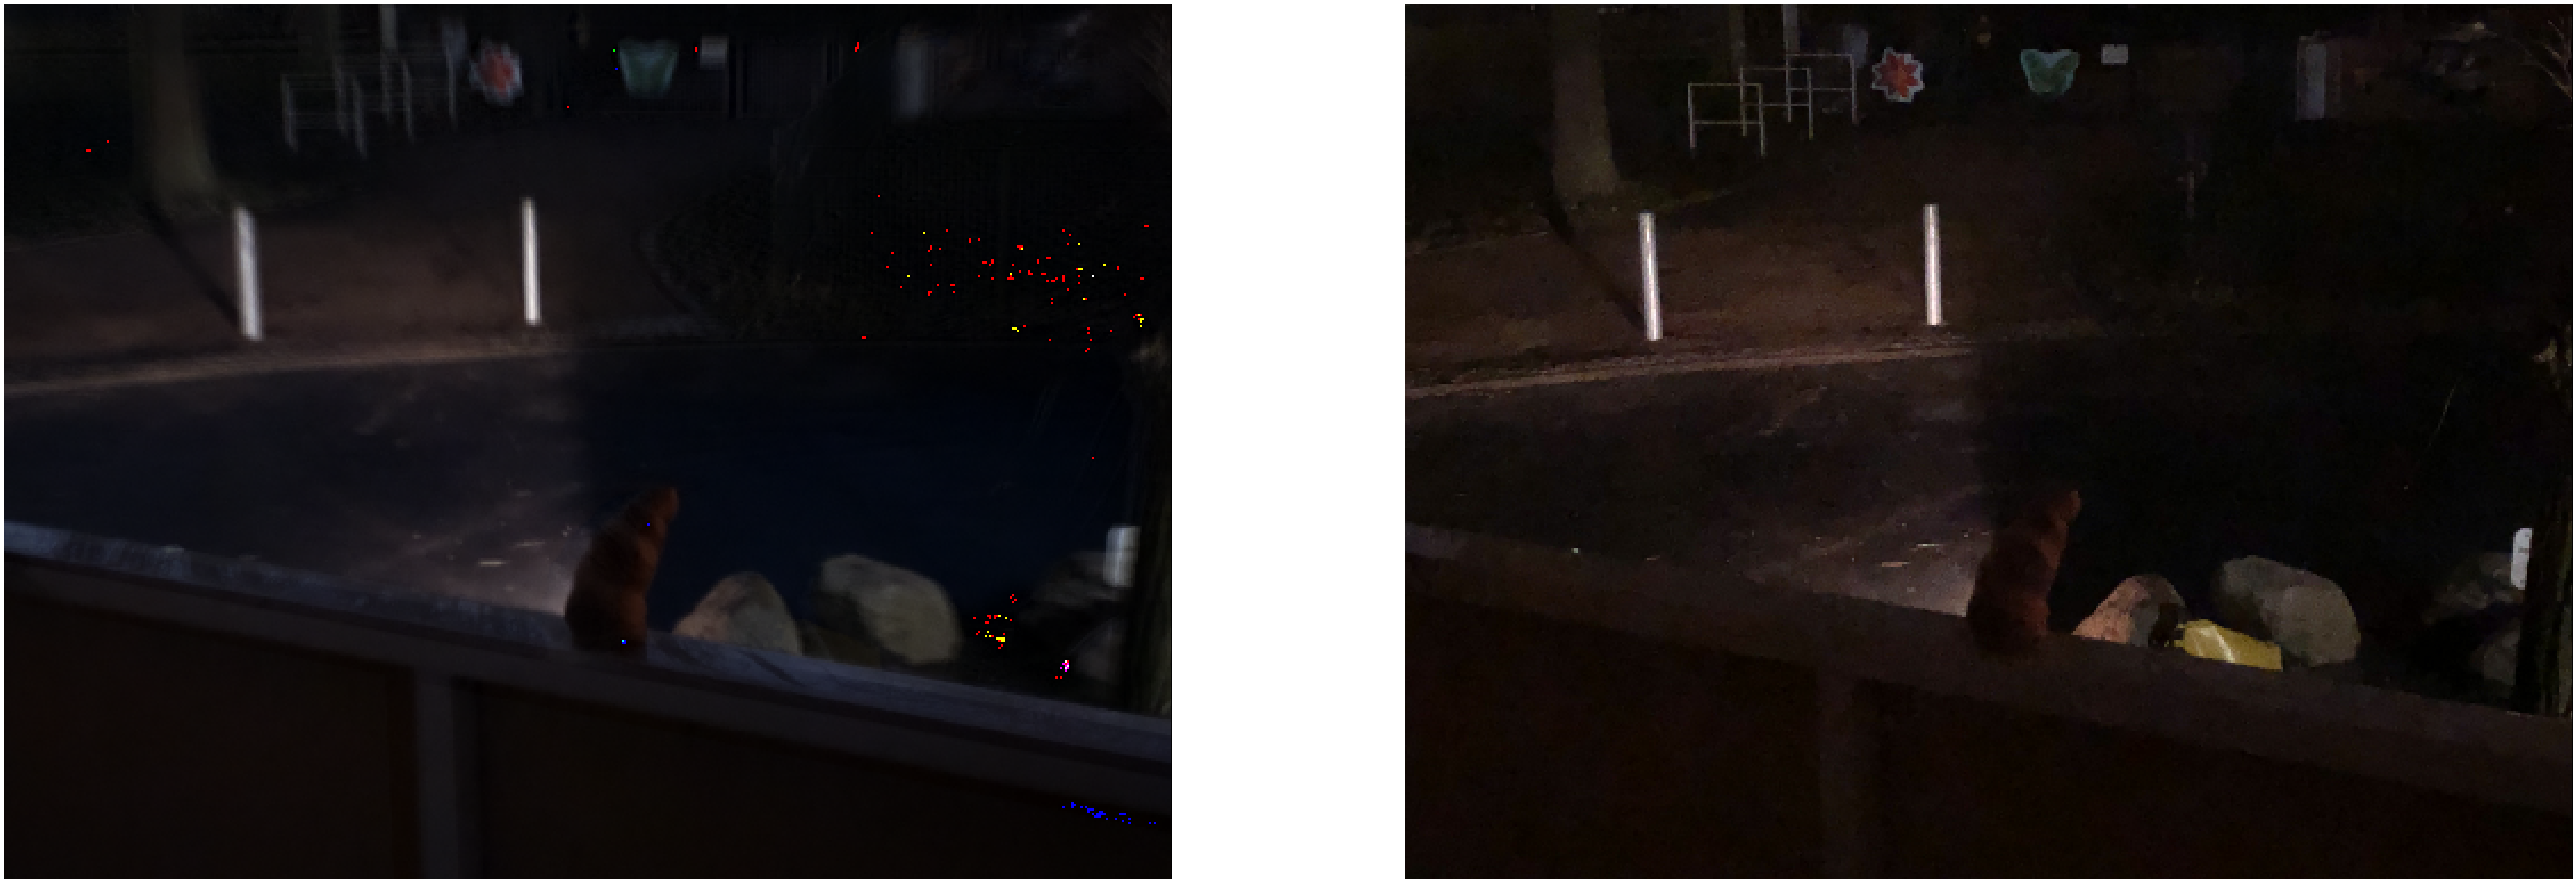

In [12]:
p2 = plt.figure(figsize=(200, 300))

# Plot the reconstructed photo
ax3 = p2.add_subplot(1, 3, 1, xticks = [], yticks = [])
ax3.imshow(reconstruct_image(recon_imgs[23])[::-1])

# Plot the original photo
ax4 = p2.add_subplot(1, 3, 2, xticks = [], yticks = [])
ax4.imshow(imgs_set[23][::-1])
plt.show()

We can find that the reconstruction also behaves well for a dark photo. Although there is some bright dots.

### Plot all reconstructions

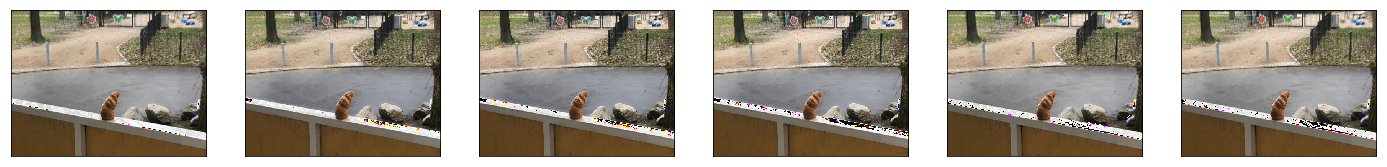

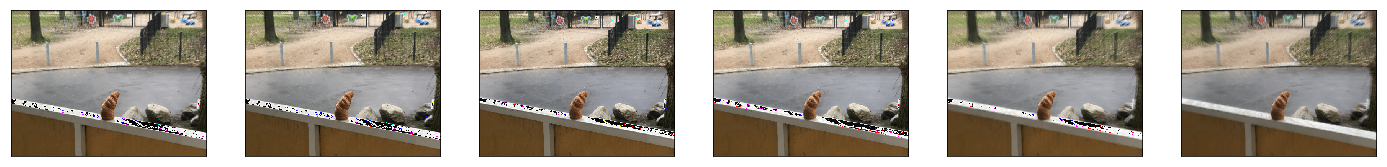

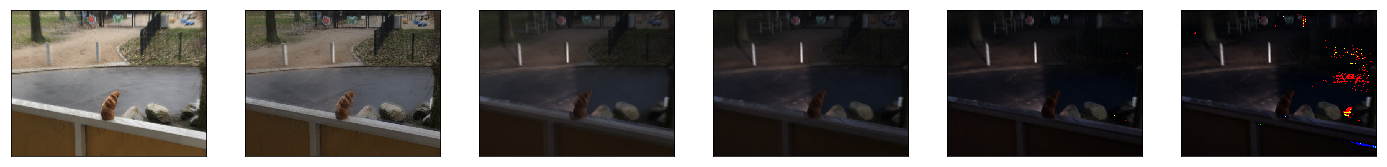

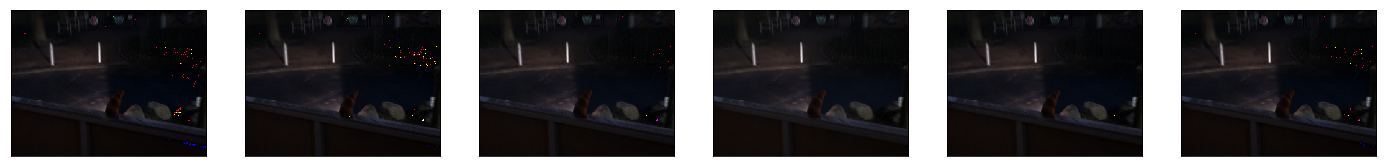

In [14]:
p1 = plt.figure(figsize=(100, 120))
for i in range(6):
    ax = p1.add_subplot(1, 24, i + 1, xticks = [], yticks = [])
    ax.imshow(reconstruct_image(recon_imgs[i])[::-1])
p2 = plt.figure(figsize=(100, 120))
for i in range(6,12):
    ax = p2.add_subplot(1, 24, i + 1, xticks = [], yticks = [])
    ax.imshow(reconstruct_image(recon_imgs[i])[::-1])
p3 = plt.figure(figsize=(100, 120))
for i in range(12,18):
    ax = p3.add_subplot(1, 24, i + 1, xticks = [], yticks = [])
    ax.imshow(reconstruct_image(recon_imgs[i])[::-1])
p4 = plt.figure(figsize=(100, 120))
for i in range(18,24):
    ax = p4.add_subplot(1, 24, i + 1, xticks = [], yticks = [])
    ax.imshow(reconstruct_image(recon_imgs[i])[::-1])
    
plt.show()

From the plots, we can find that the reconstructions are overall great for all the photos.

## Part 4. Random Reconstructions

In the previous part, we check the reconstructions of the previous existing photos. In this part, we will try to draw some reconstructions of previously unexisted points.

### Randomly pick points near existing points
First, we will try to pick some random points near the clustering of existing points to see the effects of reconstructions.
<img src="imgs/MainClustering.png"
     style="margin: auto;" 
     height=300
     width=450/> <br>

Centers of the three clusterings seem to be [-40000,-10000], [-40000,10000], [50000,10000]. Therefore, we will just pick these three points to see the reconstructions effects.

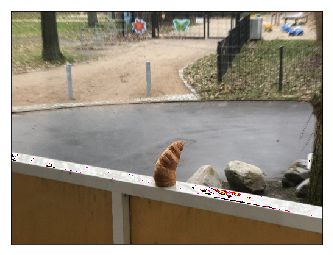

In [15]:
# Reconstruction of [-40000, -10000]
random_image = pca.inverse_transform([-40000,-10000])

p1 = plt.figure(figsize=(200, 300))
ax = p1.add_subplot(1, 30, 1, xticks = [], yticks = [])
ax.imshow(reconstruct_image(random_image)[::-1])
plt.show()

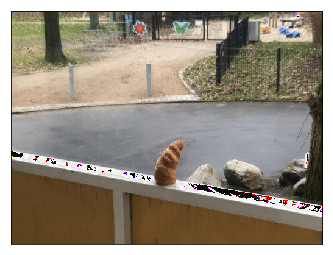

In [16]:
# Reconstruction of [-40000, 10000]
random_image = pca.inverse_transform([-40000,10000])

p1 = plt.figure(figsize=(200, 300))
ax = p1.add_subplot(1, 30, 1, xticks = [], yticks = [])
ax.imshow(reconstruct_image(random_image)[::-1])
plt.show()

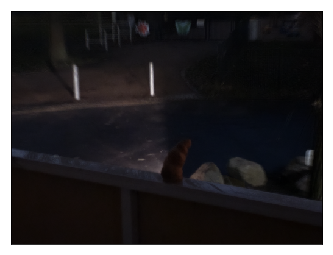

In [17]:
# Reconstruction of [50000, 0]
random_image = pca.inverse_transform([50000,0])

p1 = plt.figure(figsize=(200, 300))
ax = p1.add_subplot(1, 30, 1, xticks = [], yticks = [])
ax.imshow(reconstruct_image(random_image)[::-1])
plt.show()

From the three reconstructions above, we find that if we reconstruct a point near a clustering of a existing point, it will inherit the feature of the clustering. For example, when we plot [-40000,10000] and [-40000,10000], the reconstructions look like the photos shot with bright sky. When we plot [50000,10000], the reconstructions look like the photos shot with dark sky.

### Pick points far away from existing clusterings

In this section, we will randomly pick three points which are far away from existing clusterings. We will pick [0,0], [40000, -10000], and [-60000,15000].
<img src="imgs/WeirdPosition.png"
     style="margin: auto;" 
     height=300
     width=450/> <br>

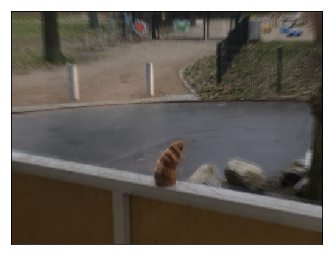

In [18]:
# Reconstruction of [0, 0]
random_image = pca.inverse_transform([0,0])

p1 = plt.figure(figsize=(200, 300))
ax = p1.add_subplot(1, 30, 1, xticks = [], yticks = [])
ax.imshow(reconstruct_image(random_image)[::-1])
plt.show()

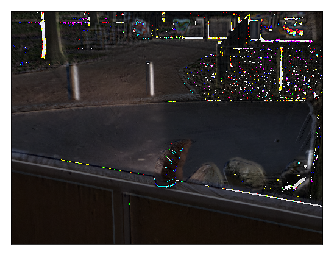

In [19]:
# Reconstruction of [40000, -10000]
random_image = pca.inverse_transform([40000,-10000])

p1 = plt.figure(figsize=(200, 300))
ax = p1.add_subplot(1, 30, 1, xticks = [], yticks = [])
ax.imshow(reconstruct_image(random_image)[::-1])
plt.show()

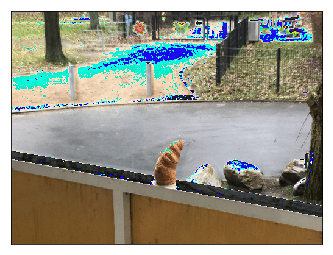

In [20]:
# Reconstruction of [-60000,15000]
random_image = pca.inverse_transform([-60000,15000])

p1 = plt.figure(figsize=(200, 300))
ax = p1.add_subplot(1, 30, 1, xticks = [], yticks = [])
ax.imshow(reconstruct_image(random_image)[::-1])
plt.show()

We can observe that: 
1. When the random picked point is compassed by some clustering, the image tends to be normal, and will combines the features of all close clustering. For example, since [0,0] is in the center of all 3 clusterings, it shows the dusk scene.
2. When the random picked point is outside the boundaries all clustering, the image will be weird. However, it still has some rules: it will become more exterme that its nearest clustering. For example, since [-60000,15000] is at the left top of [-40000,10000] it is even brighter than [-40000,10000]. Since [40000,-10000] is a little far from [50000,10000] and a little close to [-40000,-10000], it has some very bright dots.

Due to the observations, we can predict that if we draw reconstructions of points [range(-50000,60000), 0], from left to right, the sky will become darker and darker.
<img src="imgs/Darker.png"
     style="margin: auto;" 
     height=300
     width=450/> <br>

Okay! Let's test the prediction!!!

### Test the prediction

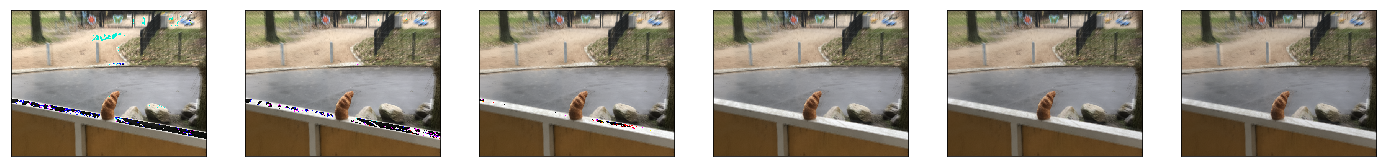

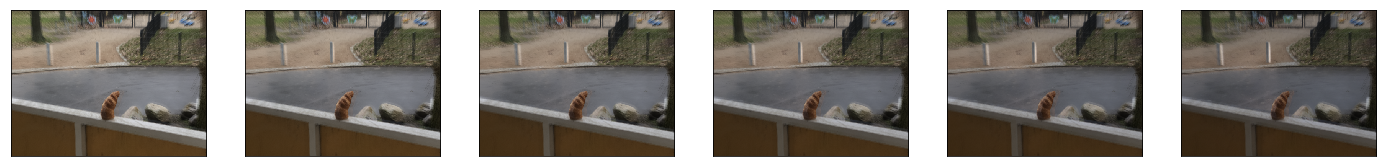

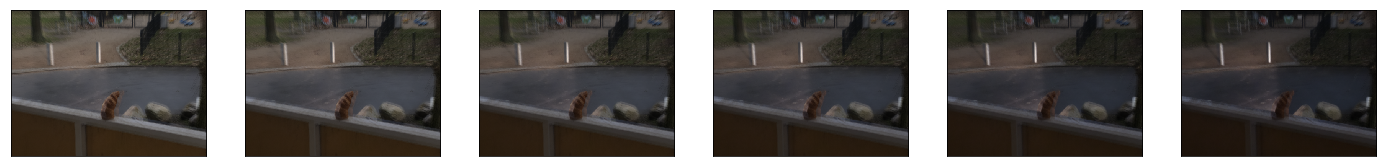

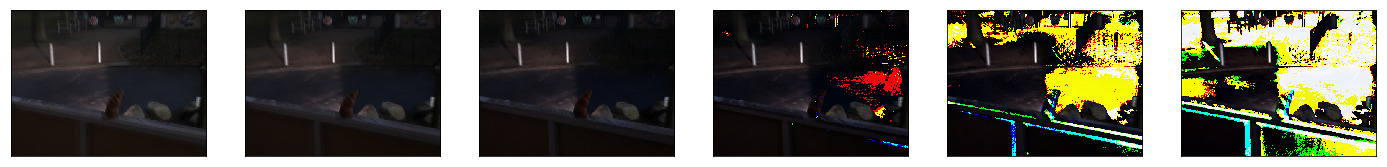

In [21]:
# Plot 24 reconstructed photos of points in [range(-50000,60000), 0]
p1 = plt.figure(figsize=(100, 120))
for i in range(6):
    ax = p1.add_subplot(1, 24, i + 1, xticks = [], yticks = [])
    ax.imshow(reconstruct_image(pca.inverse_transform([-50000+i*5000,0]))[::-1])
p2 = plt.figure(figsize=(100, 120))
for i in range(6,12):
    ax = p2.add_subplot(1, 24, i + 1, xticks = [], yticks = [])
    ax.imshow(reconstruct_image(pca.inverse_transform([-50000+i*5000,0]))[::-1])
p3 = plt.figure(figsize=(100, 120))
for i in range(12,18):
    ax = p3.add_subplot(1, 24, i + 1, xticks = [], yticks = [])
    ax.imshow(reconstruct_image(pca.inverse_transform([-50000+i*5000,0]))[::-1])
p4 = plt.figure(figsize=(100, 120))
for i in range(18,24):
    ax = p4.add_subplot(1, 24, i + 1, xticks = [], yticks = [])
    ax.imshow(reconstruct_image(pca.inverse_transform([-50000+i*5000,0]))[::-1])
    
plt.show()

From the plot, we can tell that the prediction is correct!!!